#### Monte Carlo Simulation of Stock Prices using GBM
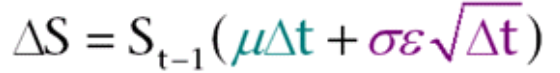

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def mcs_gbm_1(S0, mu, sigma, T, nper):
    delta_t = T/nper
    drift = mu*delta_t
    path = [S0]
    nper -= 1
    while nper:
        volatility = sigma*math.sqrt(delta_t)*np.random.normal()
        change = S0*(drift + volatility)
        St = S0 + change
        path.append(St)
        S0 = St
        nper -= 1
    return path

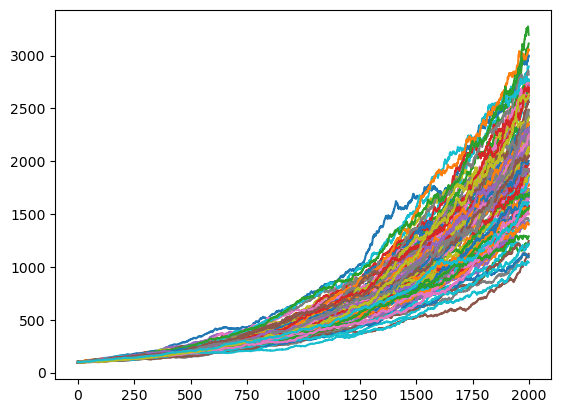

In [29]:
# Multiple Paths
sims = 100
N = 2000
while sims:
    path = mcs_gbm_1(100, 3, .25, 1, N) # 1 year and 2000 periods
    plt.plot(range(N), path)
    sims -= 1
plt.show()

#### Returns are Log-Normally distributed
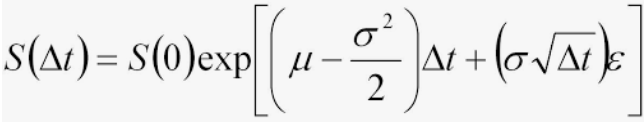

In [4]:
def mcs_gbm_2(S0, mu, sigma, T, nper):
    delta_t = T/nper
    drift = (mu - pow(sigma,2)/2)*delta_t
    path = [S0]
    nper -= 1
    while nper:
        volatility = sigma*math.sqrt(delta_t)*np.random.normal()
        exp_change = np.exp(drift + volatility)
        St = S0 * exp_change
        path.append(St)
        S0 = St
        nper -= 1
    return path

In [44]:
S0 = 49
k = 50
r = 0.05
sigma = 0.20
T = .3846
mu = 0.13
num_shares = 10000
bsm_price = 240000

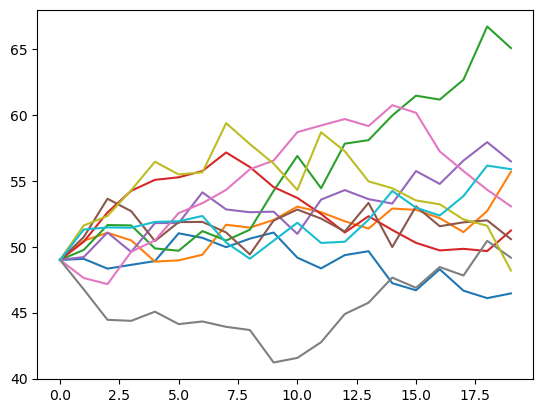

In [6]:
# Multiple Paths
sims = 10
N = math.ceil(T*52) # Periods = Number of weeks;
while sims:
    path = mcs_gbm_2(S0, mu, sigma, T, N) # delta_t = 1 week
    plt.plot(range(N), path)
    sims -= 1
plt.show()

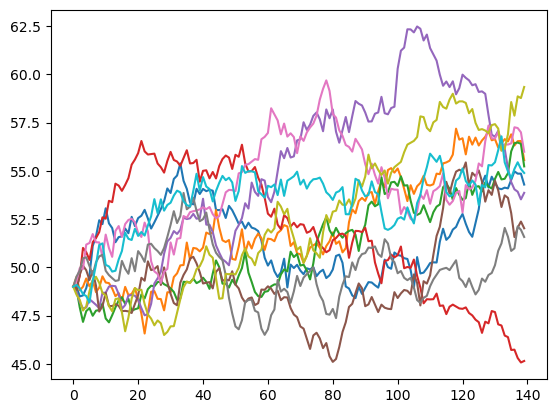

In [7]:
# Multiple Paths
sims = 10
N = math.ceil(T*52*7) # Periods = Number of days;
while sims:
    path = mcs_gbm_2(S0, mu, sigma, T, N) # delta_t = 1 day
    plt.plot(range(N), path)
    sims -= 1
plt.show()

In [8]:
# Pricing a call option with 100,000 shares of the above stock at strike price at k = 50
# BSM prices this at 240,000

# Trading with Stop Loss Strategy
# After every delta_t if the stock price crosses k, i.e. either goes above k in an interval of time delta_t or goes below, we
# buy and sell respectively at the present stock price
def stop_loss_trading(S0, mu, sigma, T, nper, k, num_shares):
    delta_t = T/nper
    drift = (mu - pow(sigma,2)/2)*delta_t
    path = [S0]
    nper -= 1
    cost = 0
    below_k = True
    if S0 > k:
        shares = num_shares
        cost += num_shares * S0
        below_k = False
    while nper:
        volatility = sigma*math.sqrt(delta_t)*np.random.normal()
        exp_change = np.exp(drift + volatility)
        St = S0 * exp_change
        path.append(St)
        S0 = St
        
        # Cost of stop loss hedging
        if below_k and S0 > k:
            below_k = False
            cost += num_shares * S0
        elif not below_k and S0 < k:
            below_k = True
            cost -= num_shares * S0
        
        nper -= 1
    
    if not below_k:
        # Option exercised
        cost -= num_shares * k
    return path, cost

In [48]:
nsims = 1000
results_mat = np.zeros(shape = (6,5))
result_i = 0

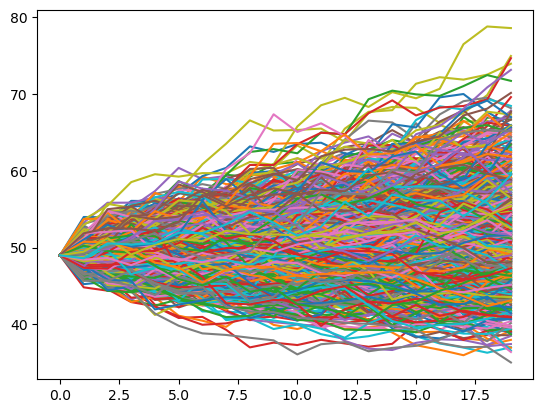

19028.193883159496
20717.423280284125
0.07928414117983124


In [49]:
# 100 Sims with delta_t = 1 week
sims = nsims
paths = []
costs = []
N = math.ceil(T*52) # 20 weeks
delta_t = 1 # Weeks
while sims:
    path, cost = stop_loss_trading(S0, mu, sigma, T, N, k, num_shares)
    paths.append(path)
    costs.append(cost)
    sims -= 1
    plt.plot(range(N), path)
plt.show()

results_mat[result_i][0] = delta_t
results_mat[result_i][1] = np.mean(costs)
results_mat[result_i][2] = np.std(costs)
results_mat[result_i][3] = np.std(costs) / bsm_price
result_i += 1

print(np.std(costs))
print(np.mean(costs))
print(np.std(costs) / bsm_price)

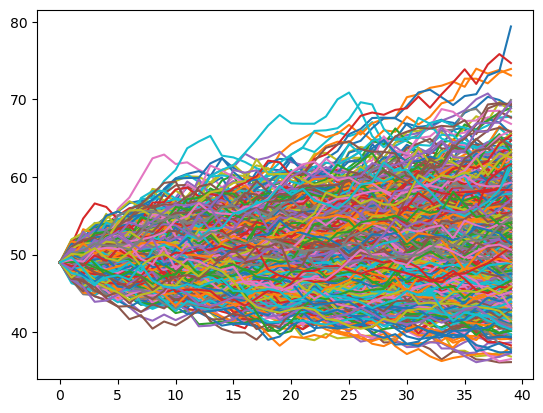

18923.277997438086
21175.457209466047
0.07884699165599203


In [50]:
# 100 Sims with delta_t = .5 week
sims = nsims
paths = []
costs = []
N = math.ceil(T*52*2) # 40 0.5 weeks
delta_t = 0.5 # Weeks
while sims:
    path, cost = stop_loss_trading(S0, mu, sigma, T, N, k, num_shares)
    paths.append(path)
    costs.append(cost)
    sims -= 1
    plt.plot(range(N), path)
plt.show()

results_mat[result_i][0] = delta_t
results_mat[result_i][1] = np.mean(costs)
results_mat[result_i][2] = np.std(costs)
results_mat[result_i][3] = np.std(costs) / bsm_price
result_i += 1

print(np.std(costs))
print(np.mean(costs))
print(np.std(costs) / bsm_price)

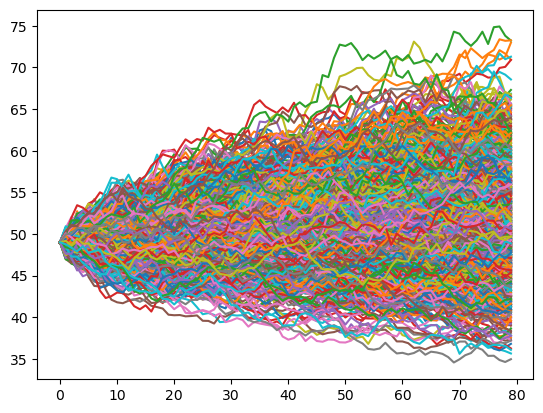

18728.342257637254
20436.066820159256
0.07803475940682189


In [53]:
# 100 Sims with delta_t = .25 week
sims = nsims
paths = []
costs = []
N = math.ceil(T*52*4) # 80 0.25 weeks
delta_t = 0.25 # Weeks
while sims:
    path, cost = stop_loss_trading(S0, mu, sigma, T, N, k, num_shares)
    paths.append(path)
    costs.append(cost)
    sims -= 1
    plt.plot(range(N), path)
plt.show()

results_mat[result_i][0] = delta_t
results_mat[result_i][1] = np.mean(costs)
results_mat[result_i][2] = np.std(costs)
results_mat[result_i][3] = np.std(costs) / bsm_price
result_i += 1

print(np.std(costs))
print(np.mean(costs))
print(np.std(costs) / bsm_price)

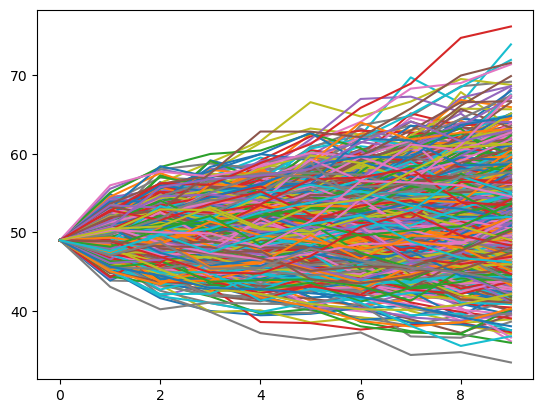

19372.193174570544
20363.468445479735
0.0807174715607106


In [51]:
# 100 Sims with delta_t = 2 weeks
sims = nsims
paths = []
costs = []
N = math.ceil(T*52/2) # 10 2 weeks
delta_t = 2 # Weeks
while sims:
    path, cost = stop_loss_trading(S0, mu, sigma, T, N, k, num_shares)
    paths.append(path)
    costs.append(cost)
    sims -= 1
    plt.plot(range(N), path)
plt.show()

results_mat[result_i][0] = delta_t
results_mat[result_i][1] = np.mean(costs)
results_mat[result_i][2] = np.std(costs)
results_mat[result_i][3] = np.std(costs) / bsm_price
result_i += 1

print(np.std(costs))
print(np.mean(costs))
print(np.std(costs) / bsm_price)

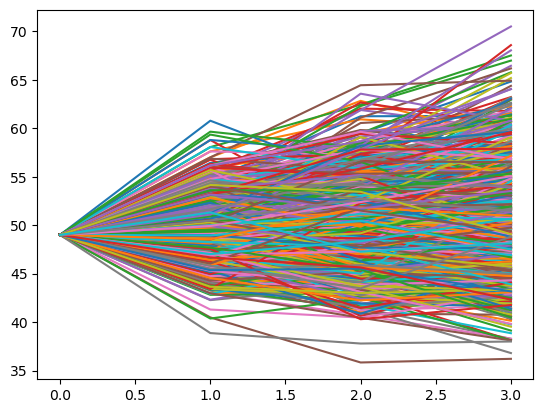

22531.23111748162
20708.262608506277
0.09388012965617341


In [54]:
# 100 Sims with delta_t = 5 weeks
sims = nsims
paths = []
costs = []
N = math.ceil(T*52/5) # 4 5 weeks
delta_t = 5 # Weeks
while sims:
    path, cost = stop_loss_trading(S0, mu, sigma, T, N, k, num_shares)
    paths.append(path)
    costs.append(cost)
    sims -= 1
    plt.plot(range(N), path)
plt.show()

results_mat[result_i][0] = delta_t
results_mat[result_i][1] = np.mean(costs)
results_mat[result_i][2] = np.std(costs)
results_mat[result_i][3] = np.std(costs) / bsm_price
result_i += 1

print(np.std(costs))
print(np.mean(costs))
print(np.std(costs) / bsm_price)

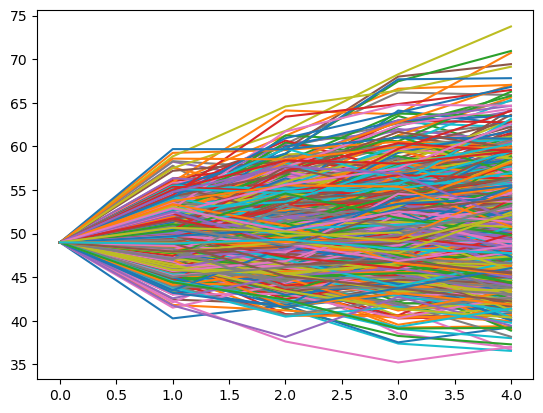

21054.399454085593
20377.295996898272
0.0877266643920233


In [52]:
# 100 Sims with delta_t = 4 weeks
sims = nsims
paths = []
costs = []
N = math.ceil(T*52/4) # 5 4 weeks
delta_t = 4 # Weeks
while sims:
    path, cost = stop_loss_trading(S0, mu, sigma, T, N, k, num_shares)
    paths.append(path)
    costs.append(cost)
    sims -= 1
    plt.plot(range(N), path)
plt.show()

results_mat[result_i][0] = delta_t
results_mat[result_i][1] = np.mean(costs)
results_mat[result_i][2] = np.std(costs)
results_mat[result_i][3] = np.std(costs) / bsm_price
result_i += 1

print(np.std(costs))
print(np.mean(costs))
print(np.std(costs) / bsm_price)

In [67]:
results_mat = results_mat[results_mat[:,0].argsort()]

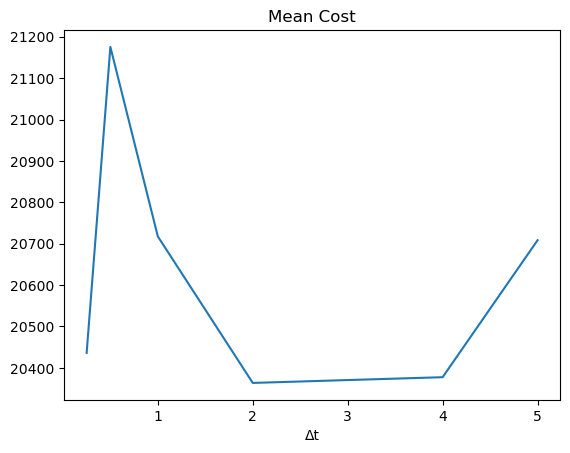

In [70]:
plt.plot(results_mat[:,0], results_mat[:,1])
plt.title("Mean Cost")
plt.xlabel(u'Δt')
plt.show()

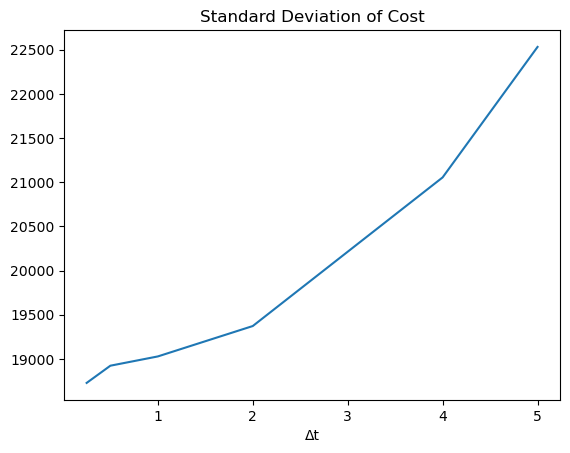

In [69]:
plt.plot(results_mat[:,0], results_mat[:,2])
plt.title("Standard Deviation of Cost")
plt.xlabel(u'Δt')
plt.show()

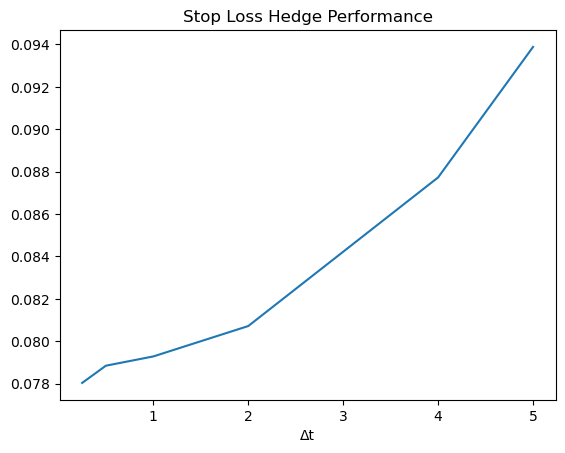

In [71]:
plt.plot(results_mat[:,0], results_mat[:,3])
plt.title("Stop Loss Hedge Performance")
plt.xlabel(u'Δt')
plt.show()